# **CUSTOMERS SEGMENTATION**

**Nhóm 7:**
1. 18120533 - Dương Đoàn Bảo Sơn
2. 18120527 - Nguyễn Đăng Quang 
3. 18120526 - Ngô Đăng Quang
**Kế hoạch thực hiện đồ án:**    


**Mô tả bài toán:**   
**Customers Segmentation**   
**Input** : Data là tập tóm tắt hành vi sử dụng của khoảng 9000 chủ thẻ tín dụng đang hoạt động trong 6 tháng, thể hiện qua 18 cột.   
**Output** : Phân cụm khách hàng 
**Các bước cơ bản** :   
1. Data processing
2. Scale
3. PCA
4. Kmeans
5. Visualization 

## **Cài đặt tuần tự**

**Thiết kế :**  
Các bước thực hiện Customers Segmentation tuần tự (các output của bước trước làm input cho bước sau) :

**Đánh giá:** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [3]:
data= pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


CUST_ID không có tác dụng trong bài toán nên bị lược bỏ

In [8]:
data = data.drop(['CUST_ID'],axis = 1)
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


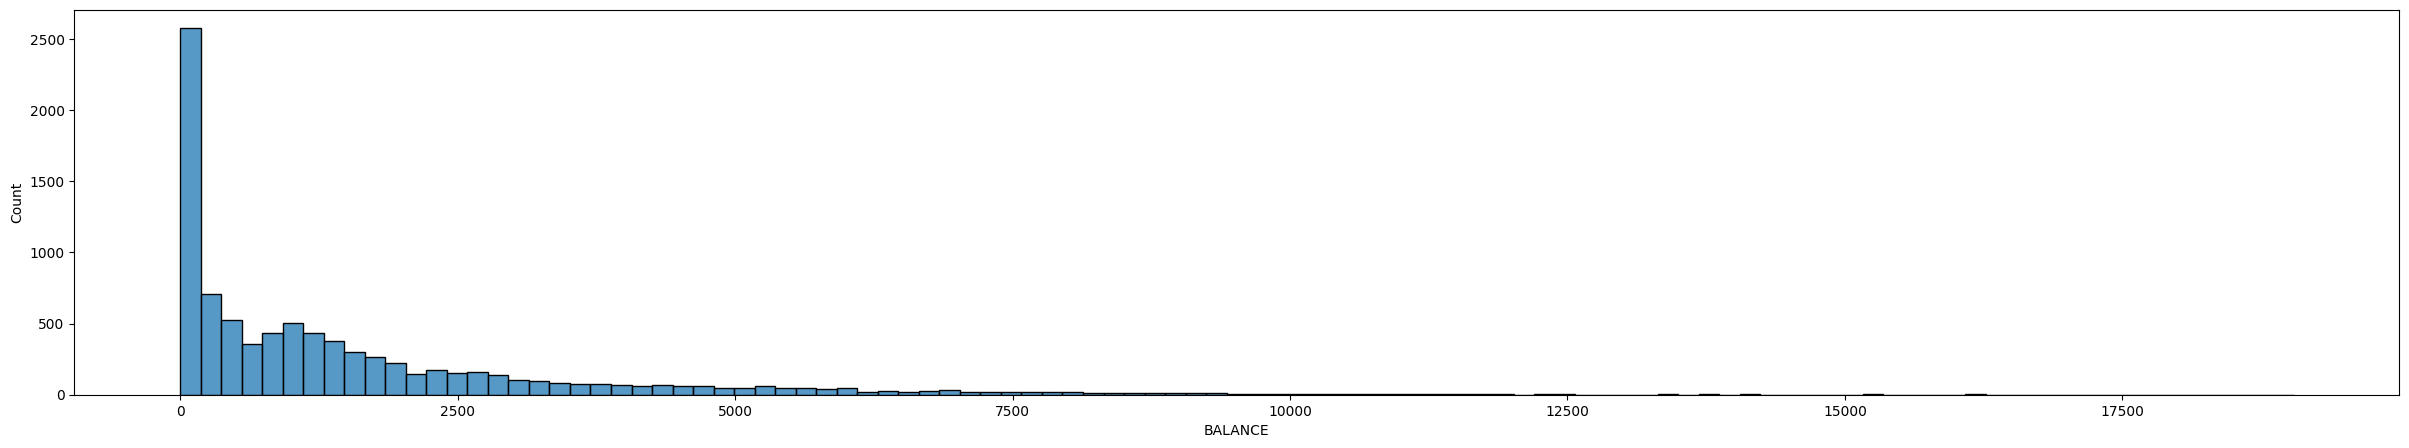

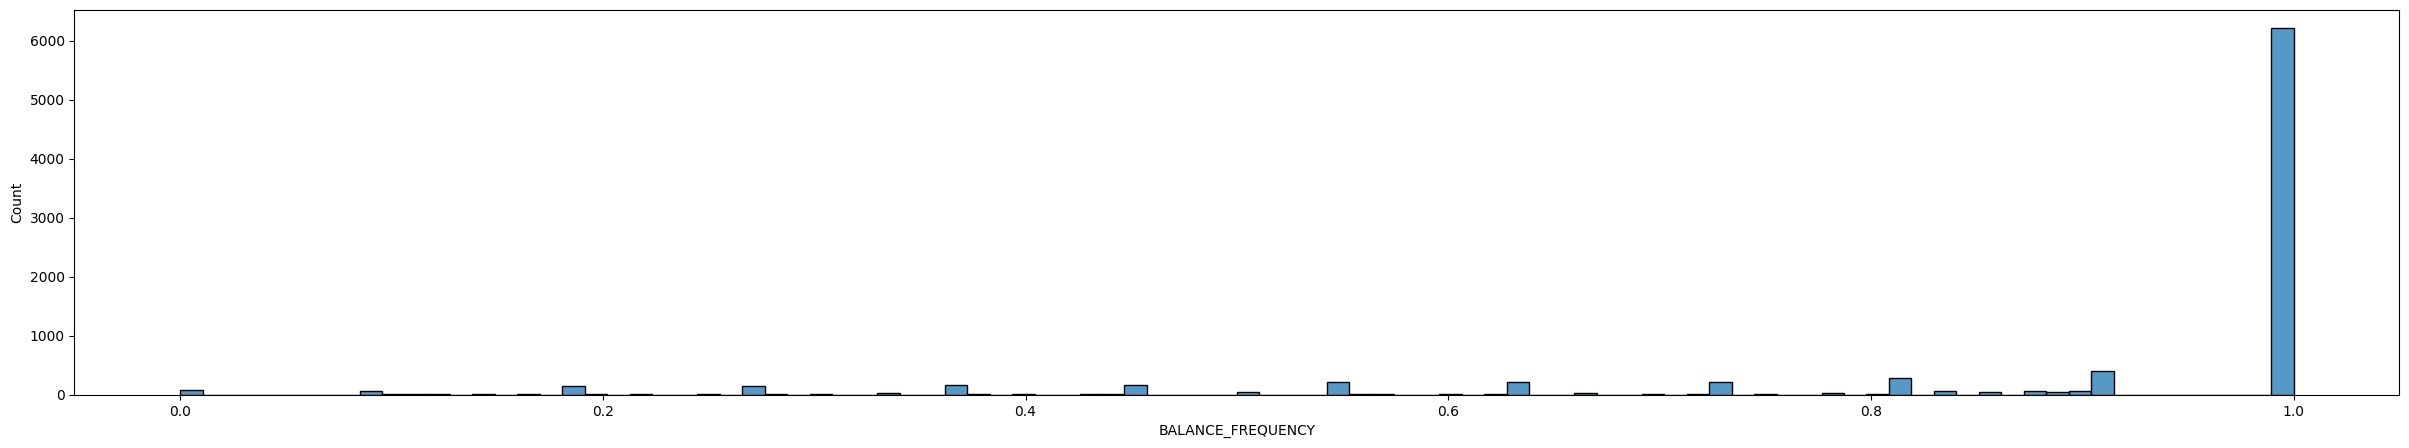

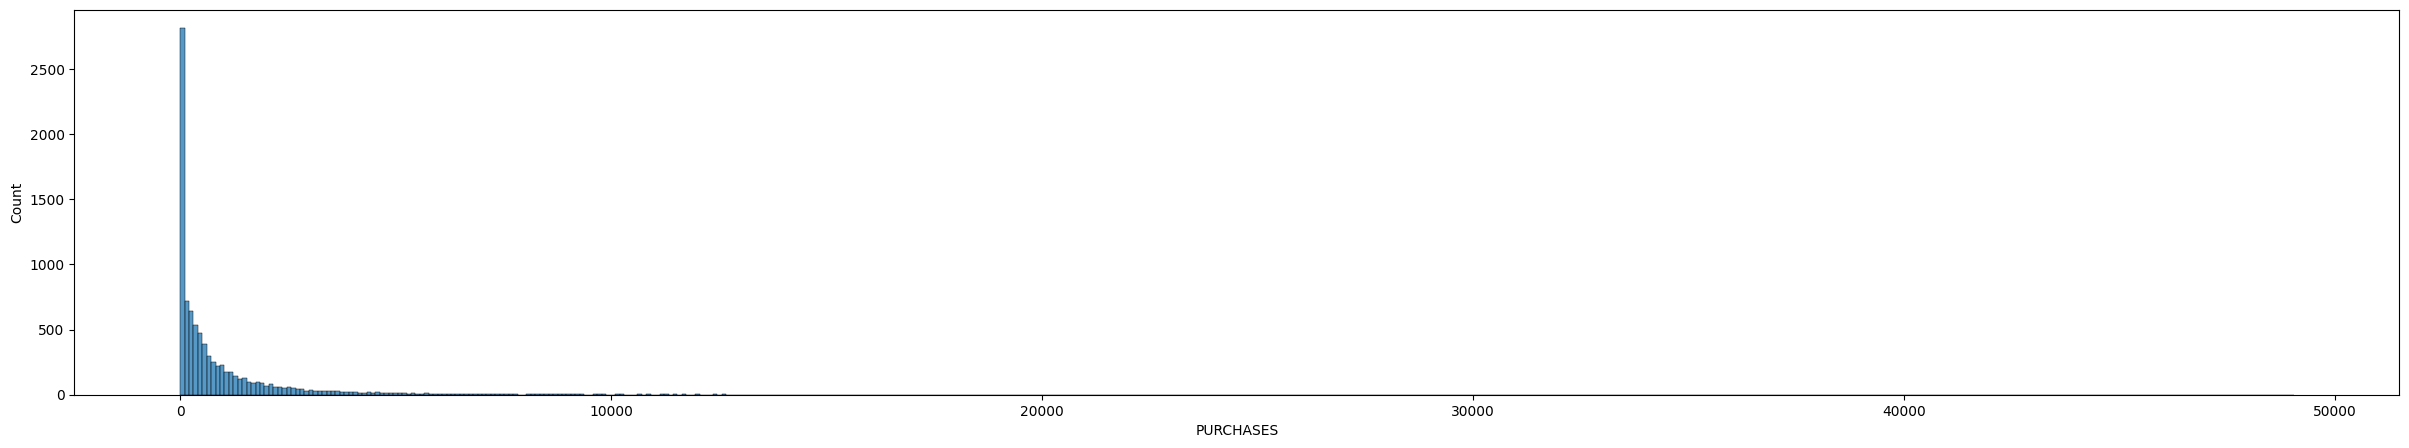

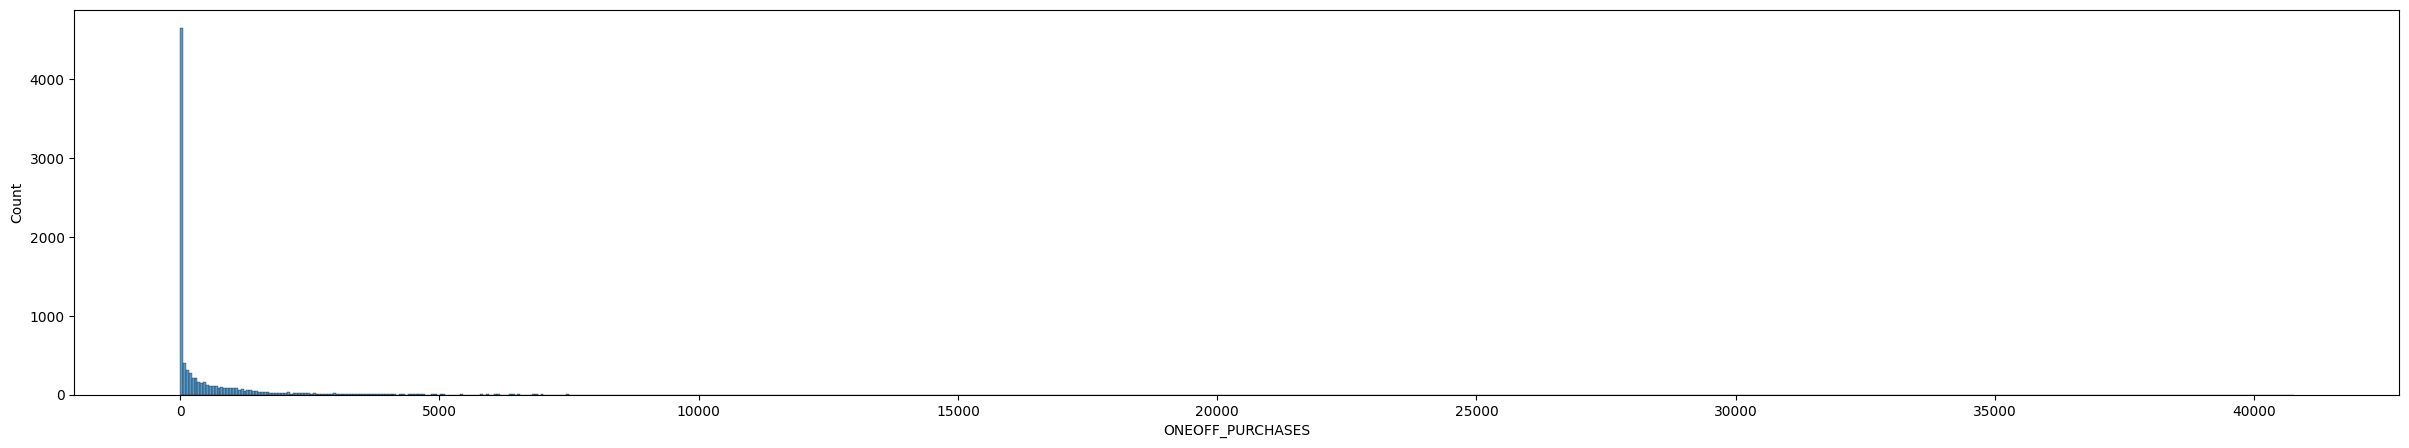

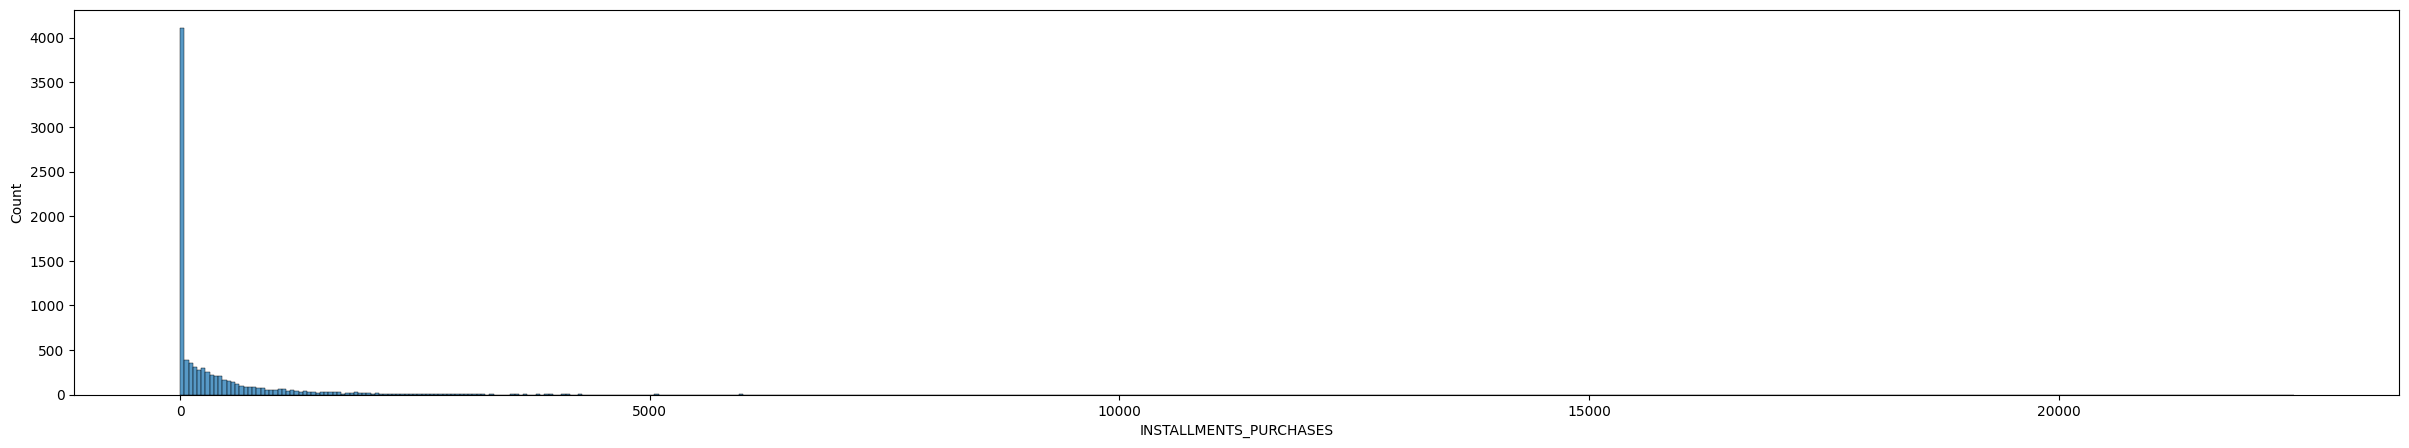

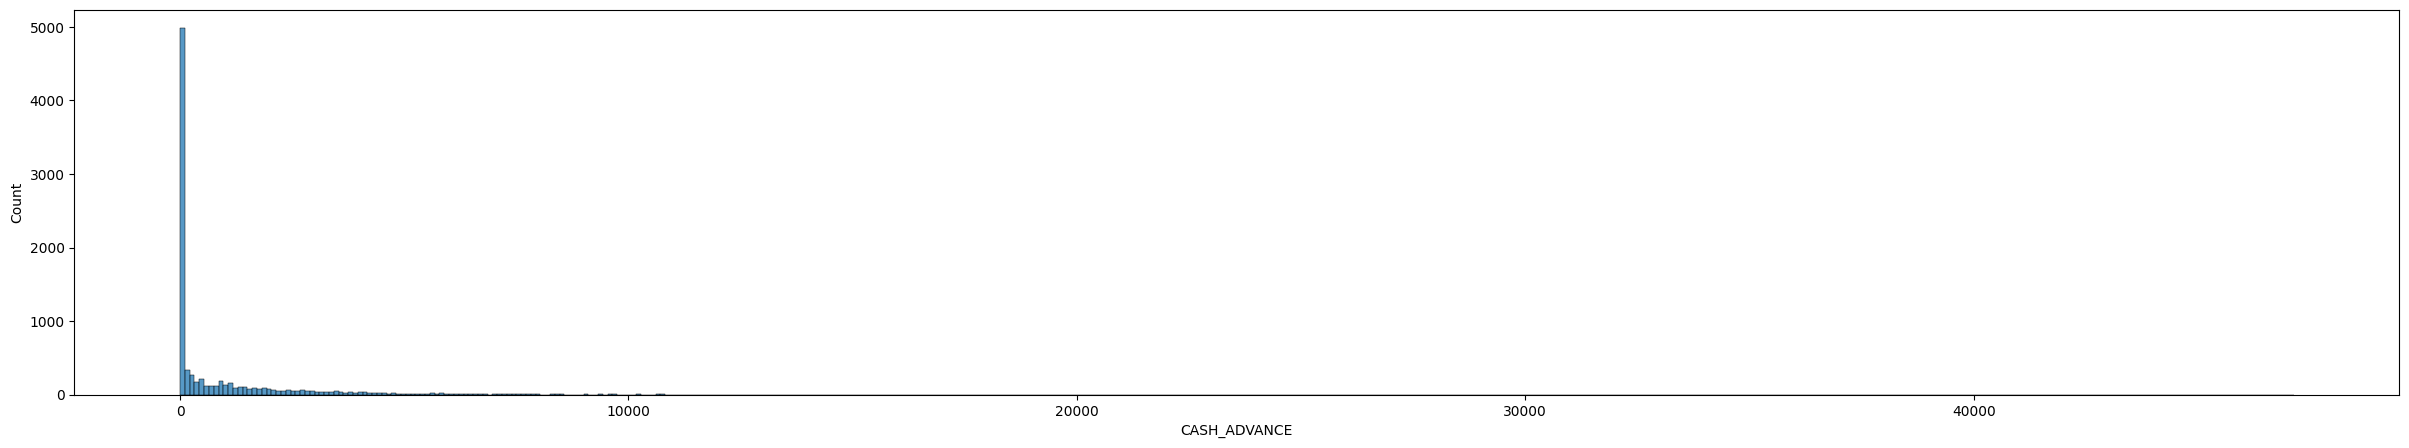

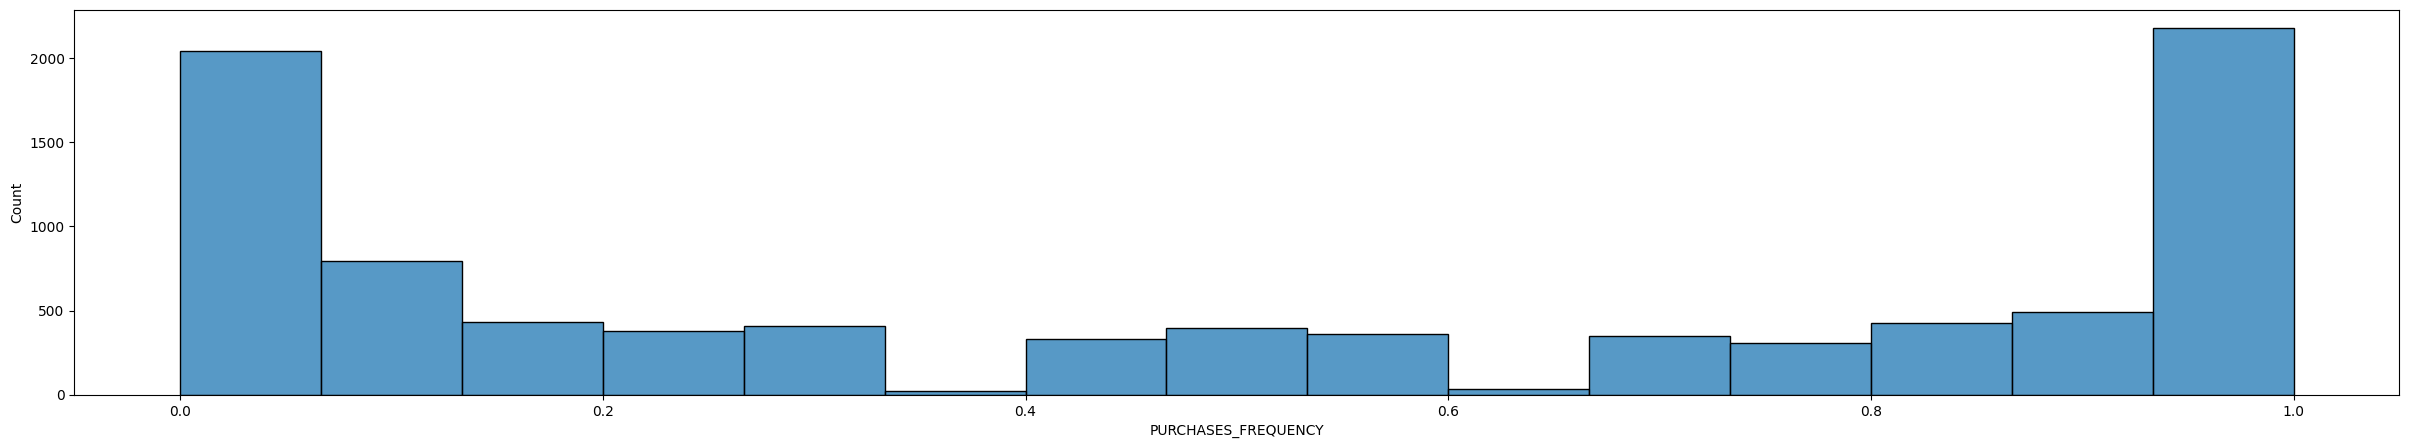

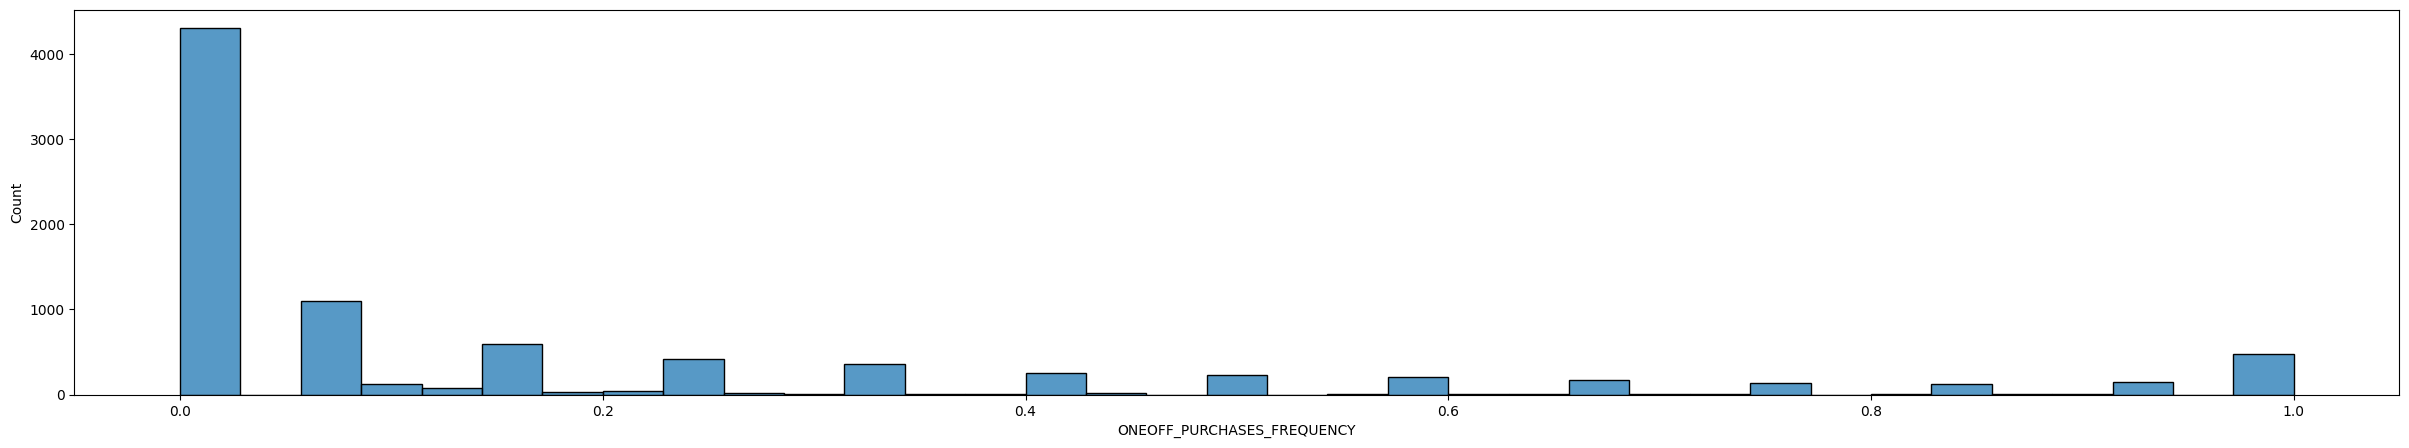

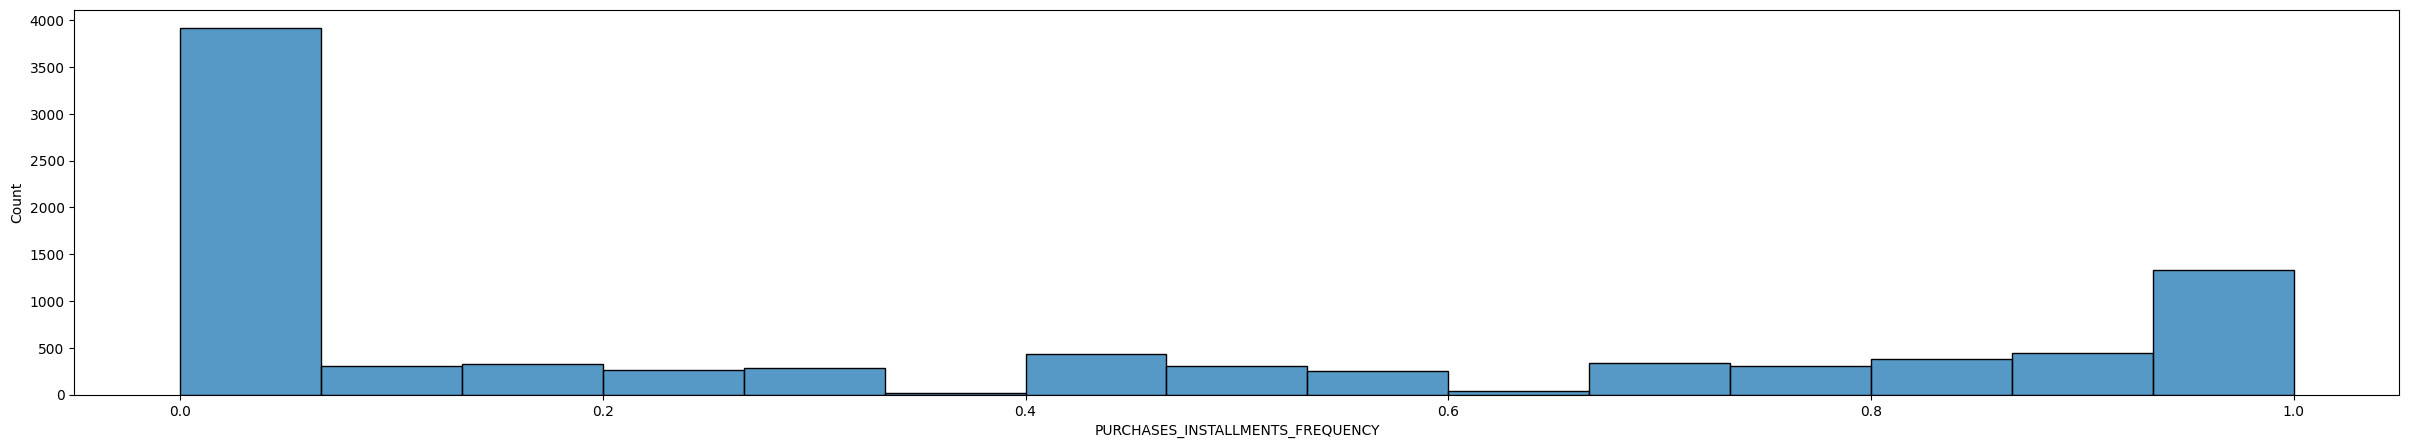

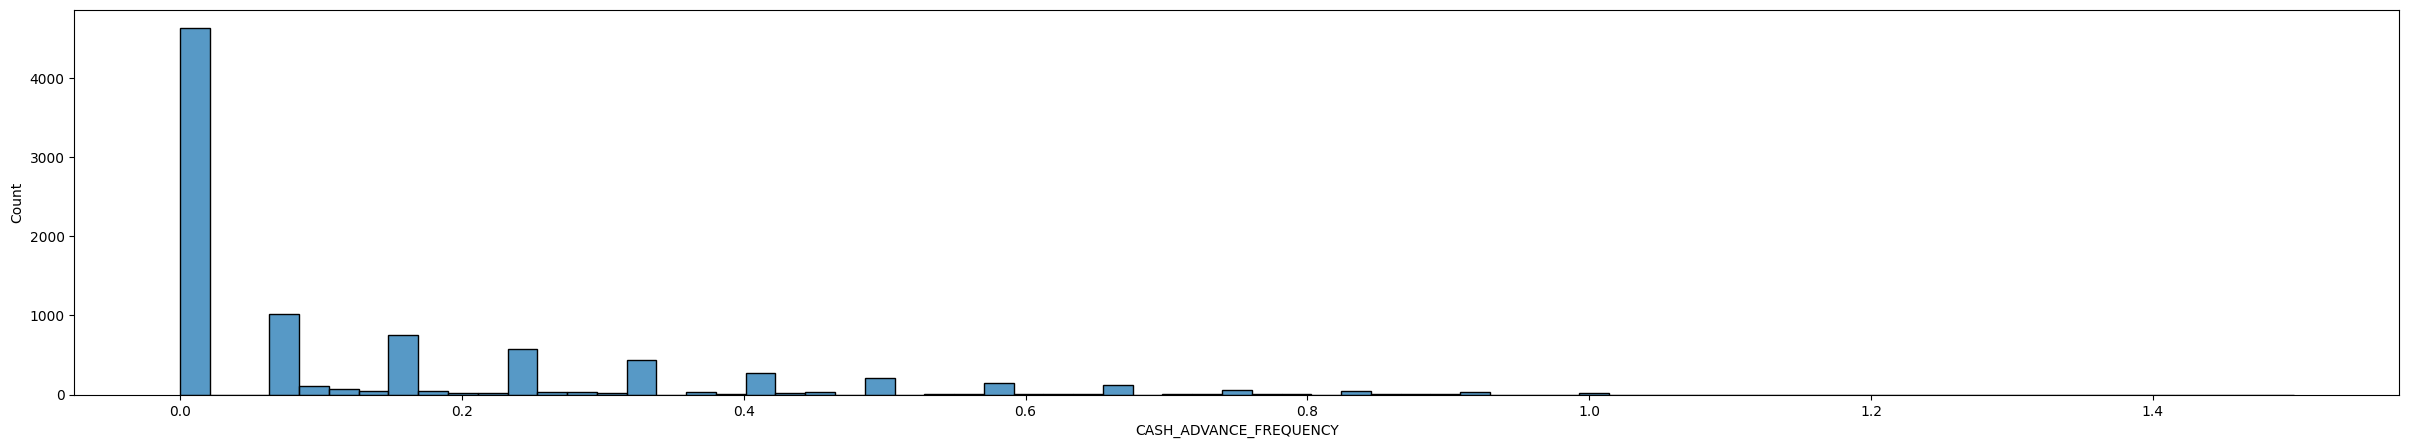

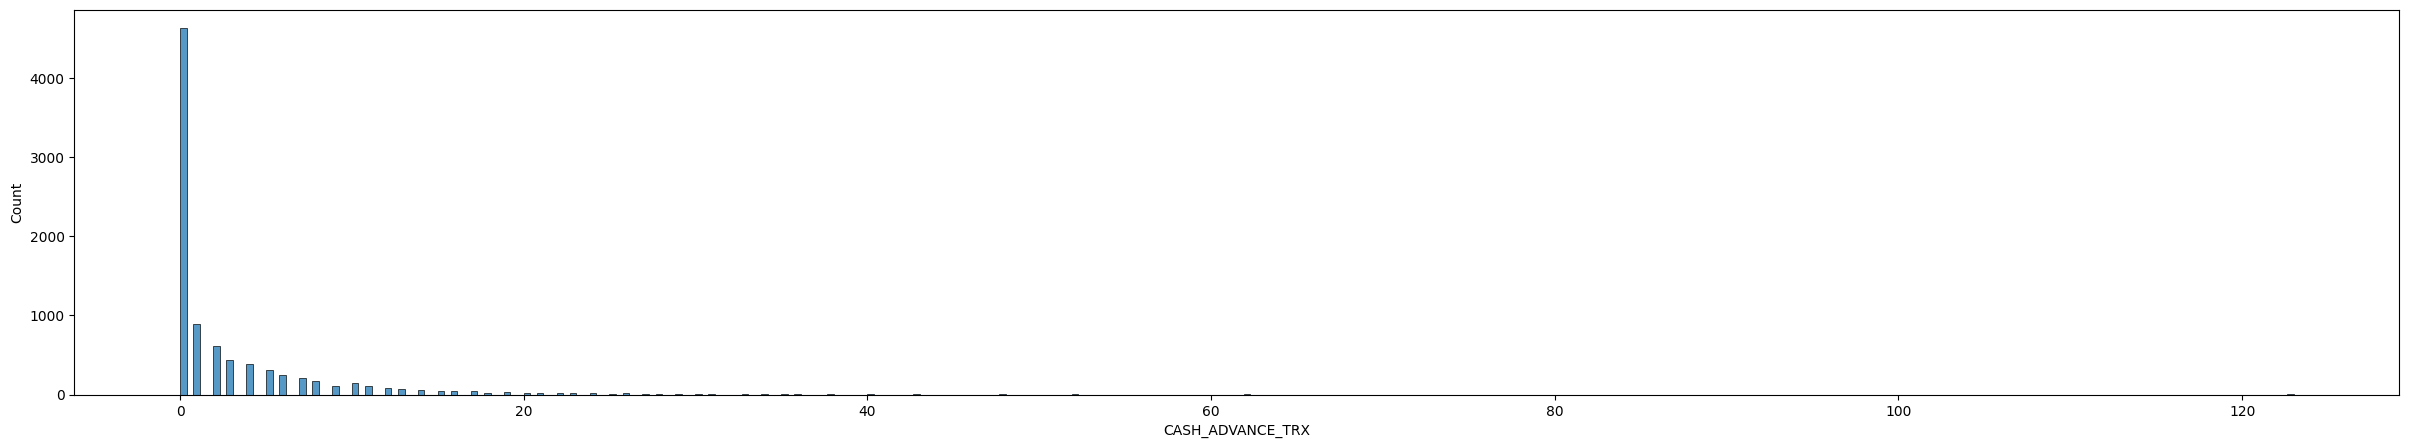

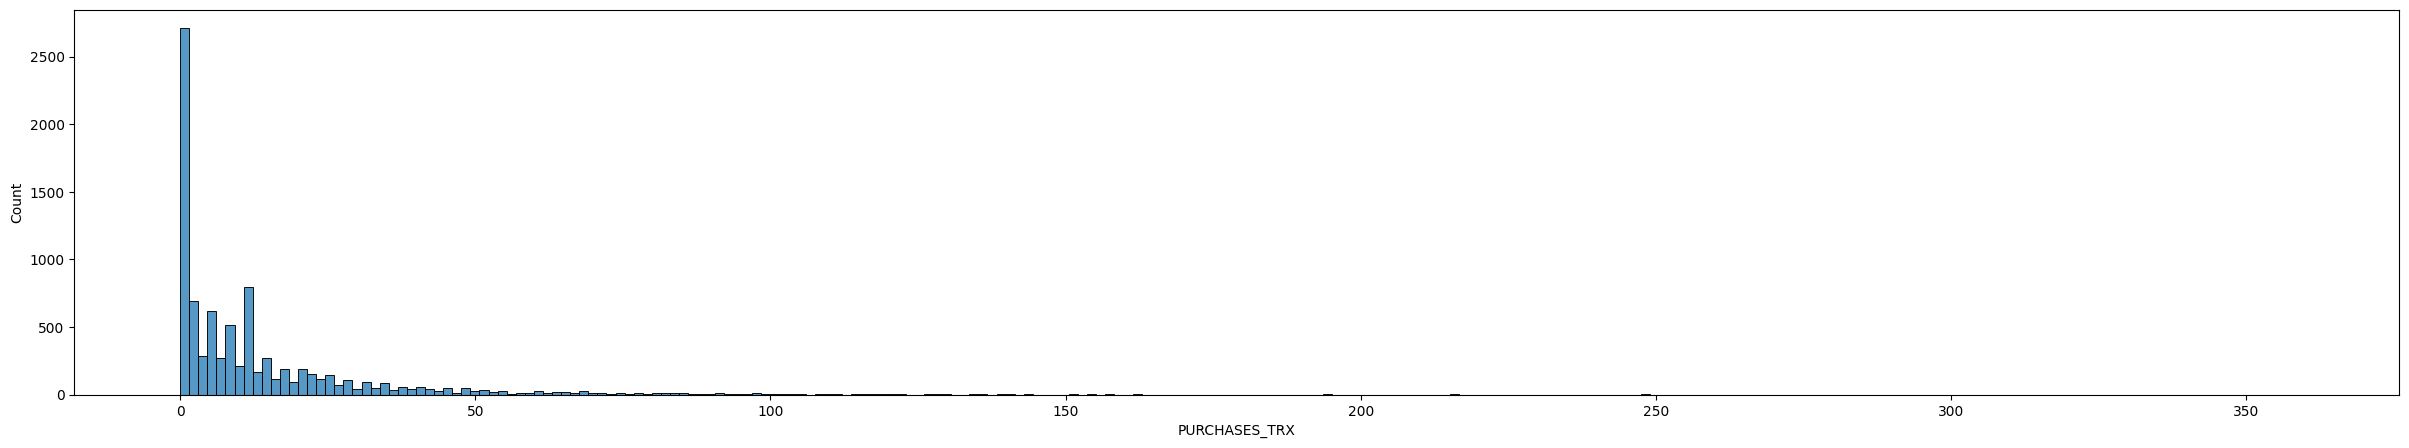

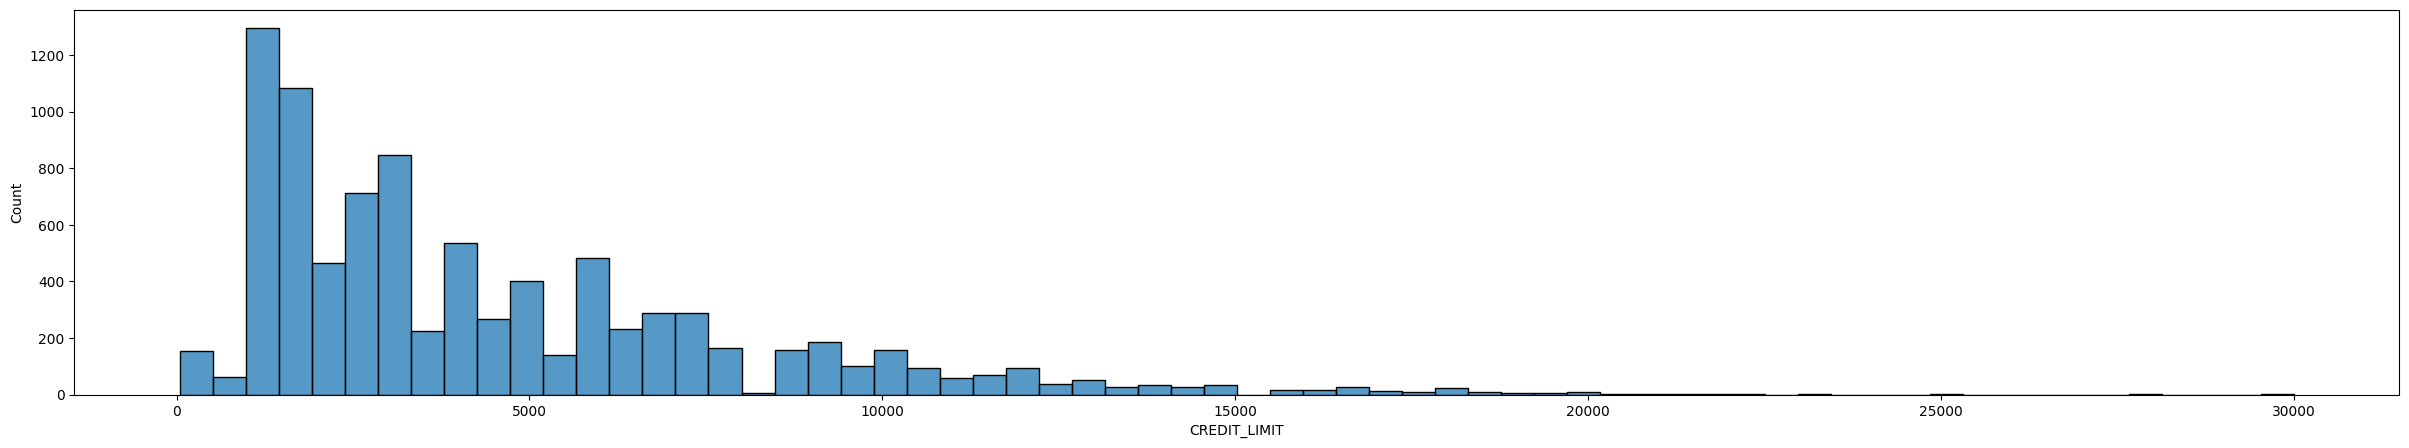

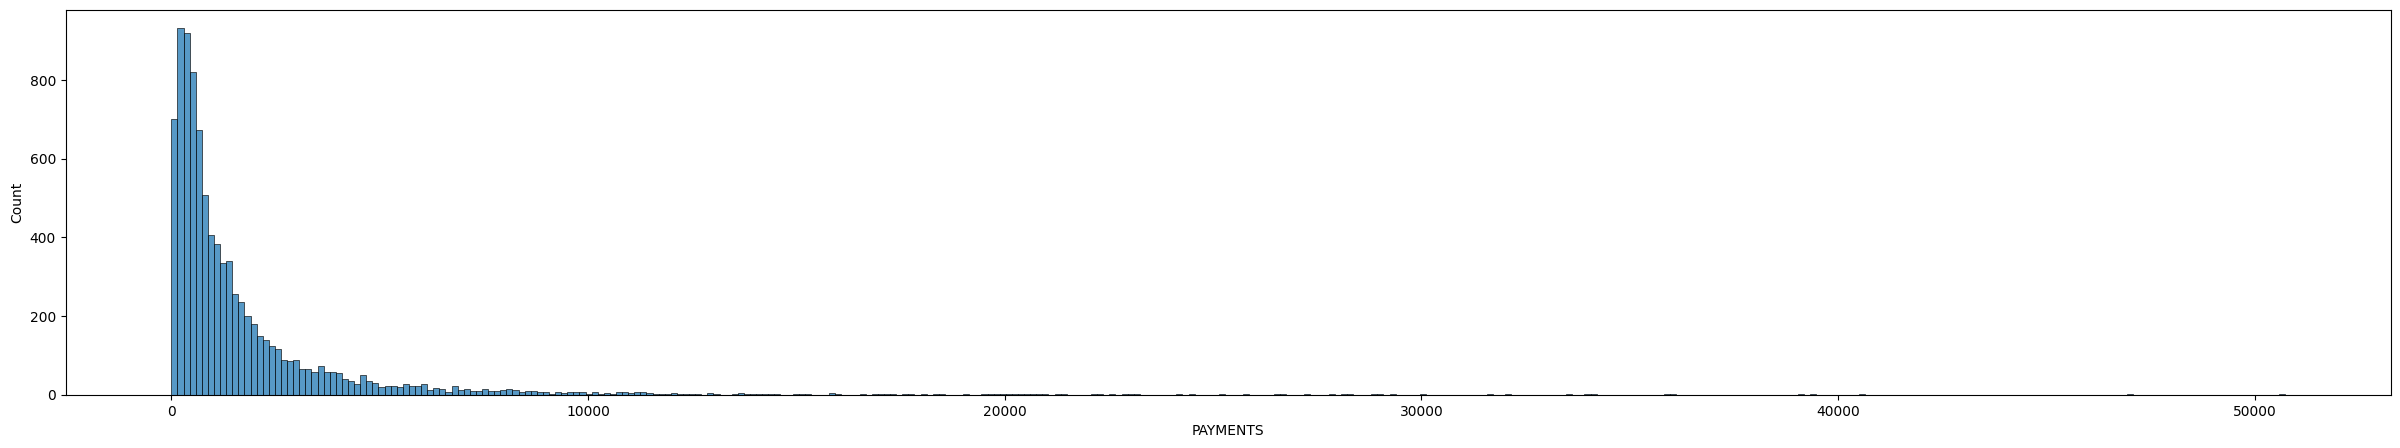

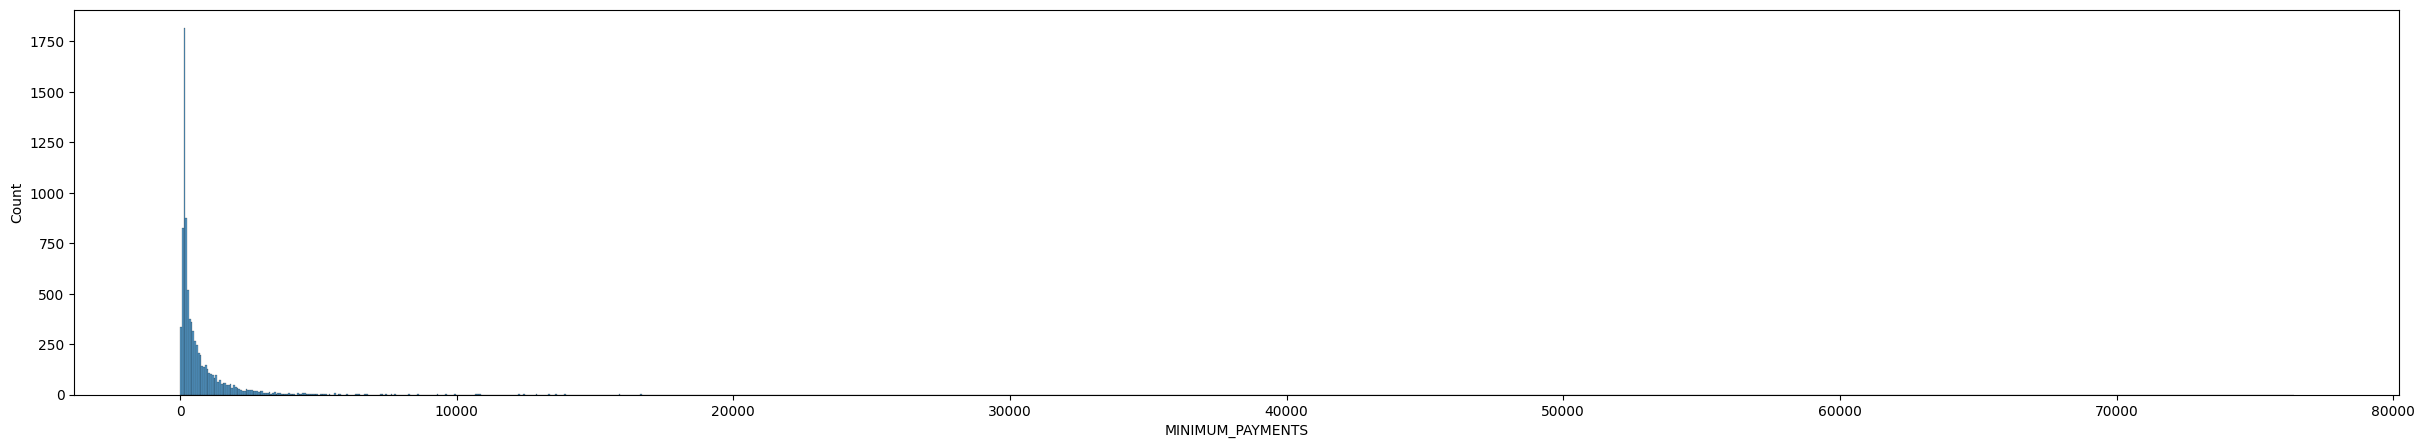

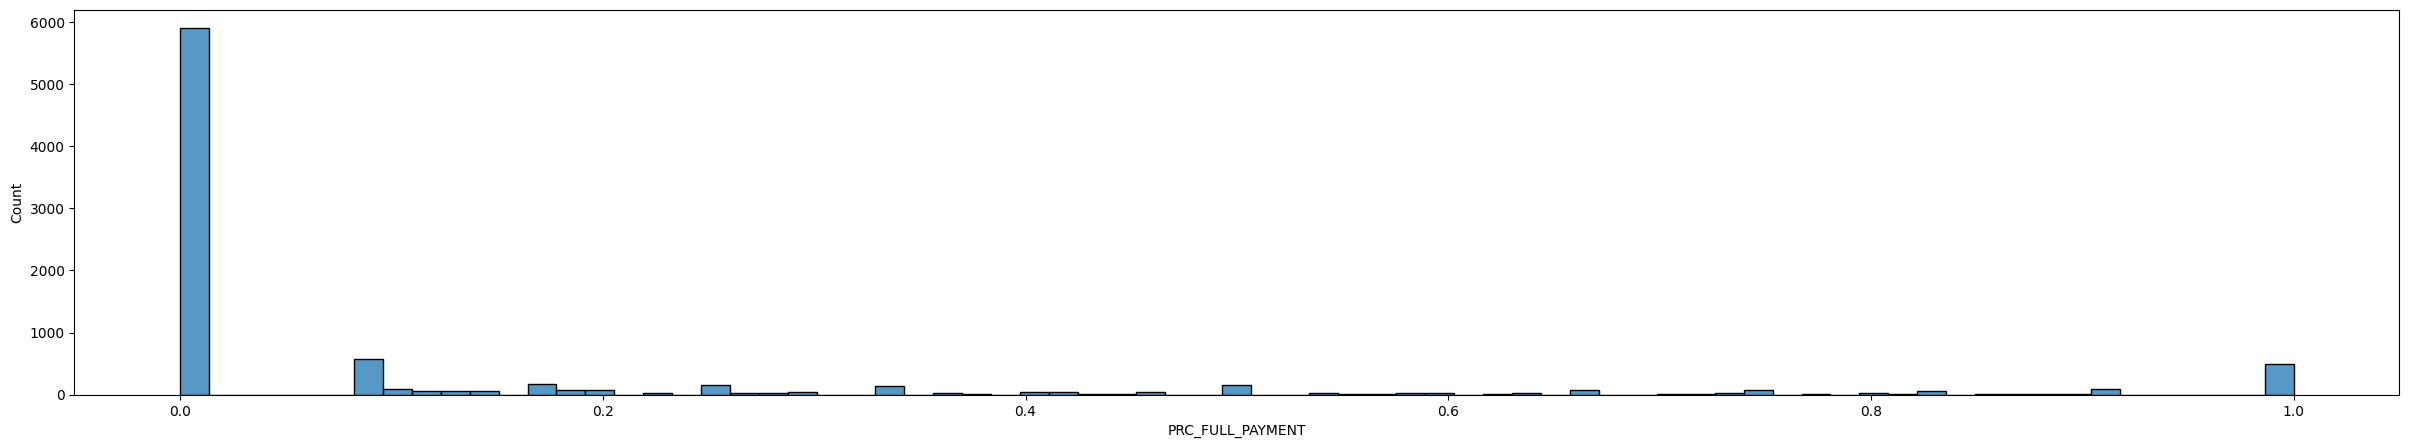

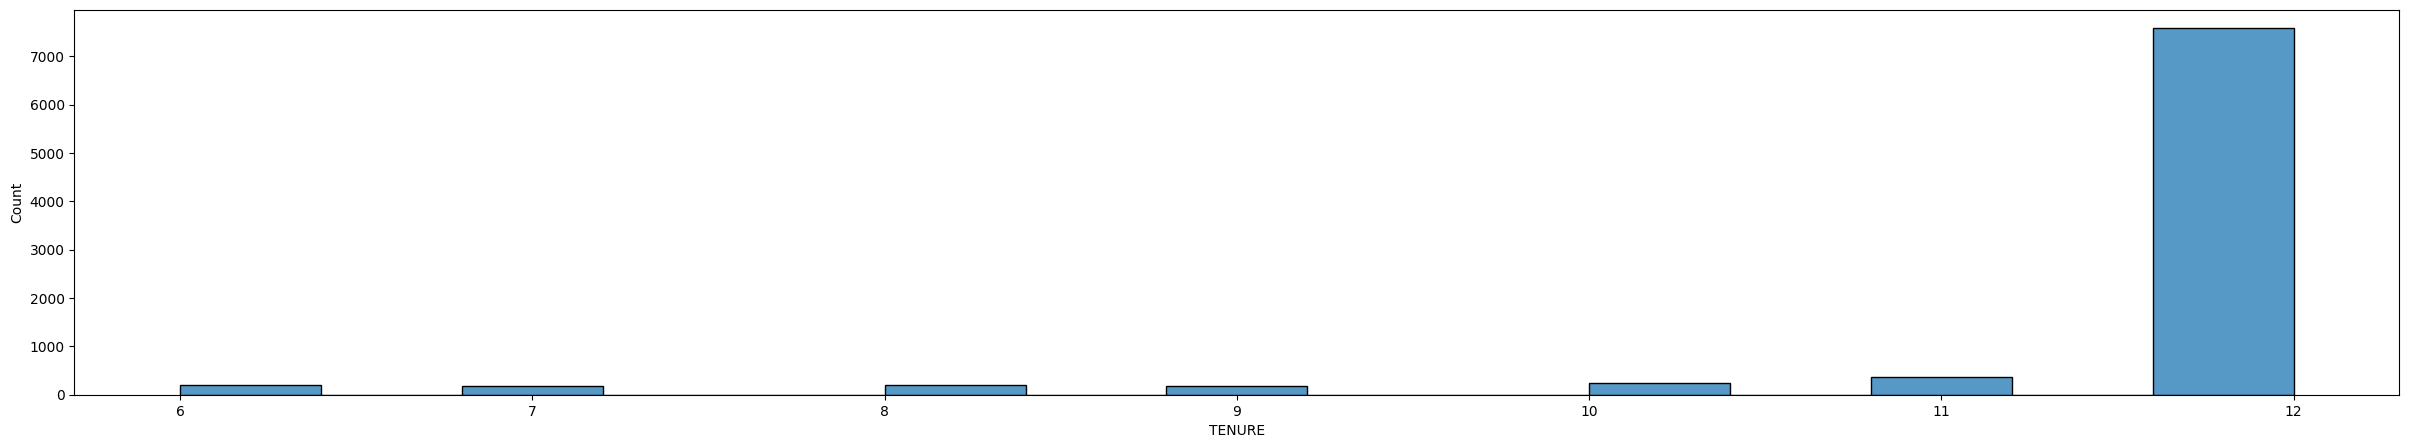

In [9]:
for column in data.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(data[column])
    plt.show()

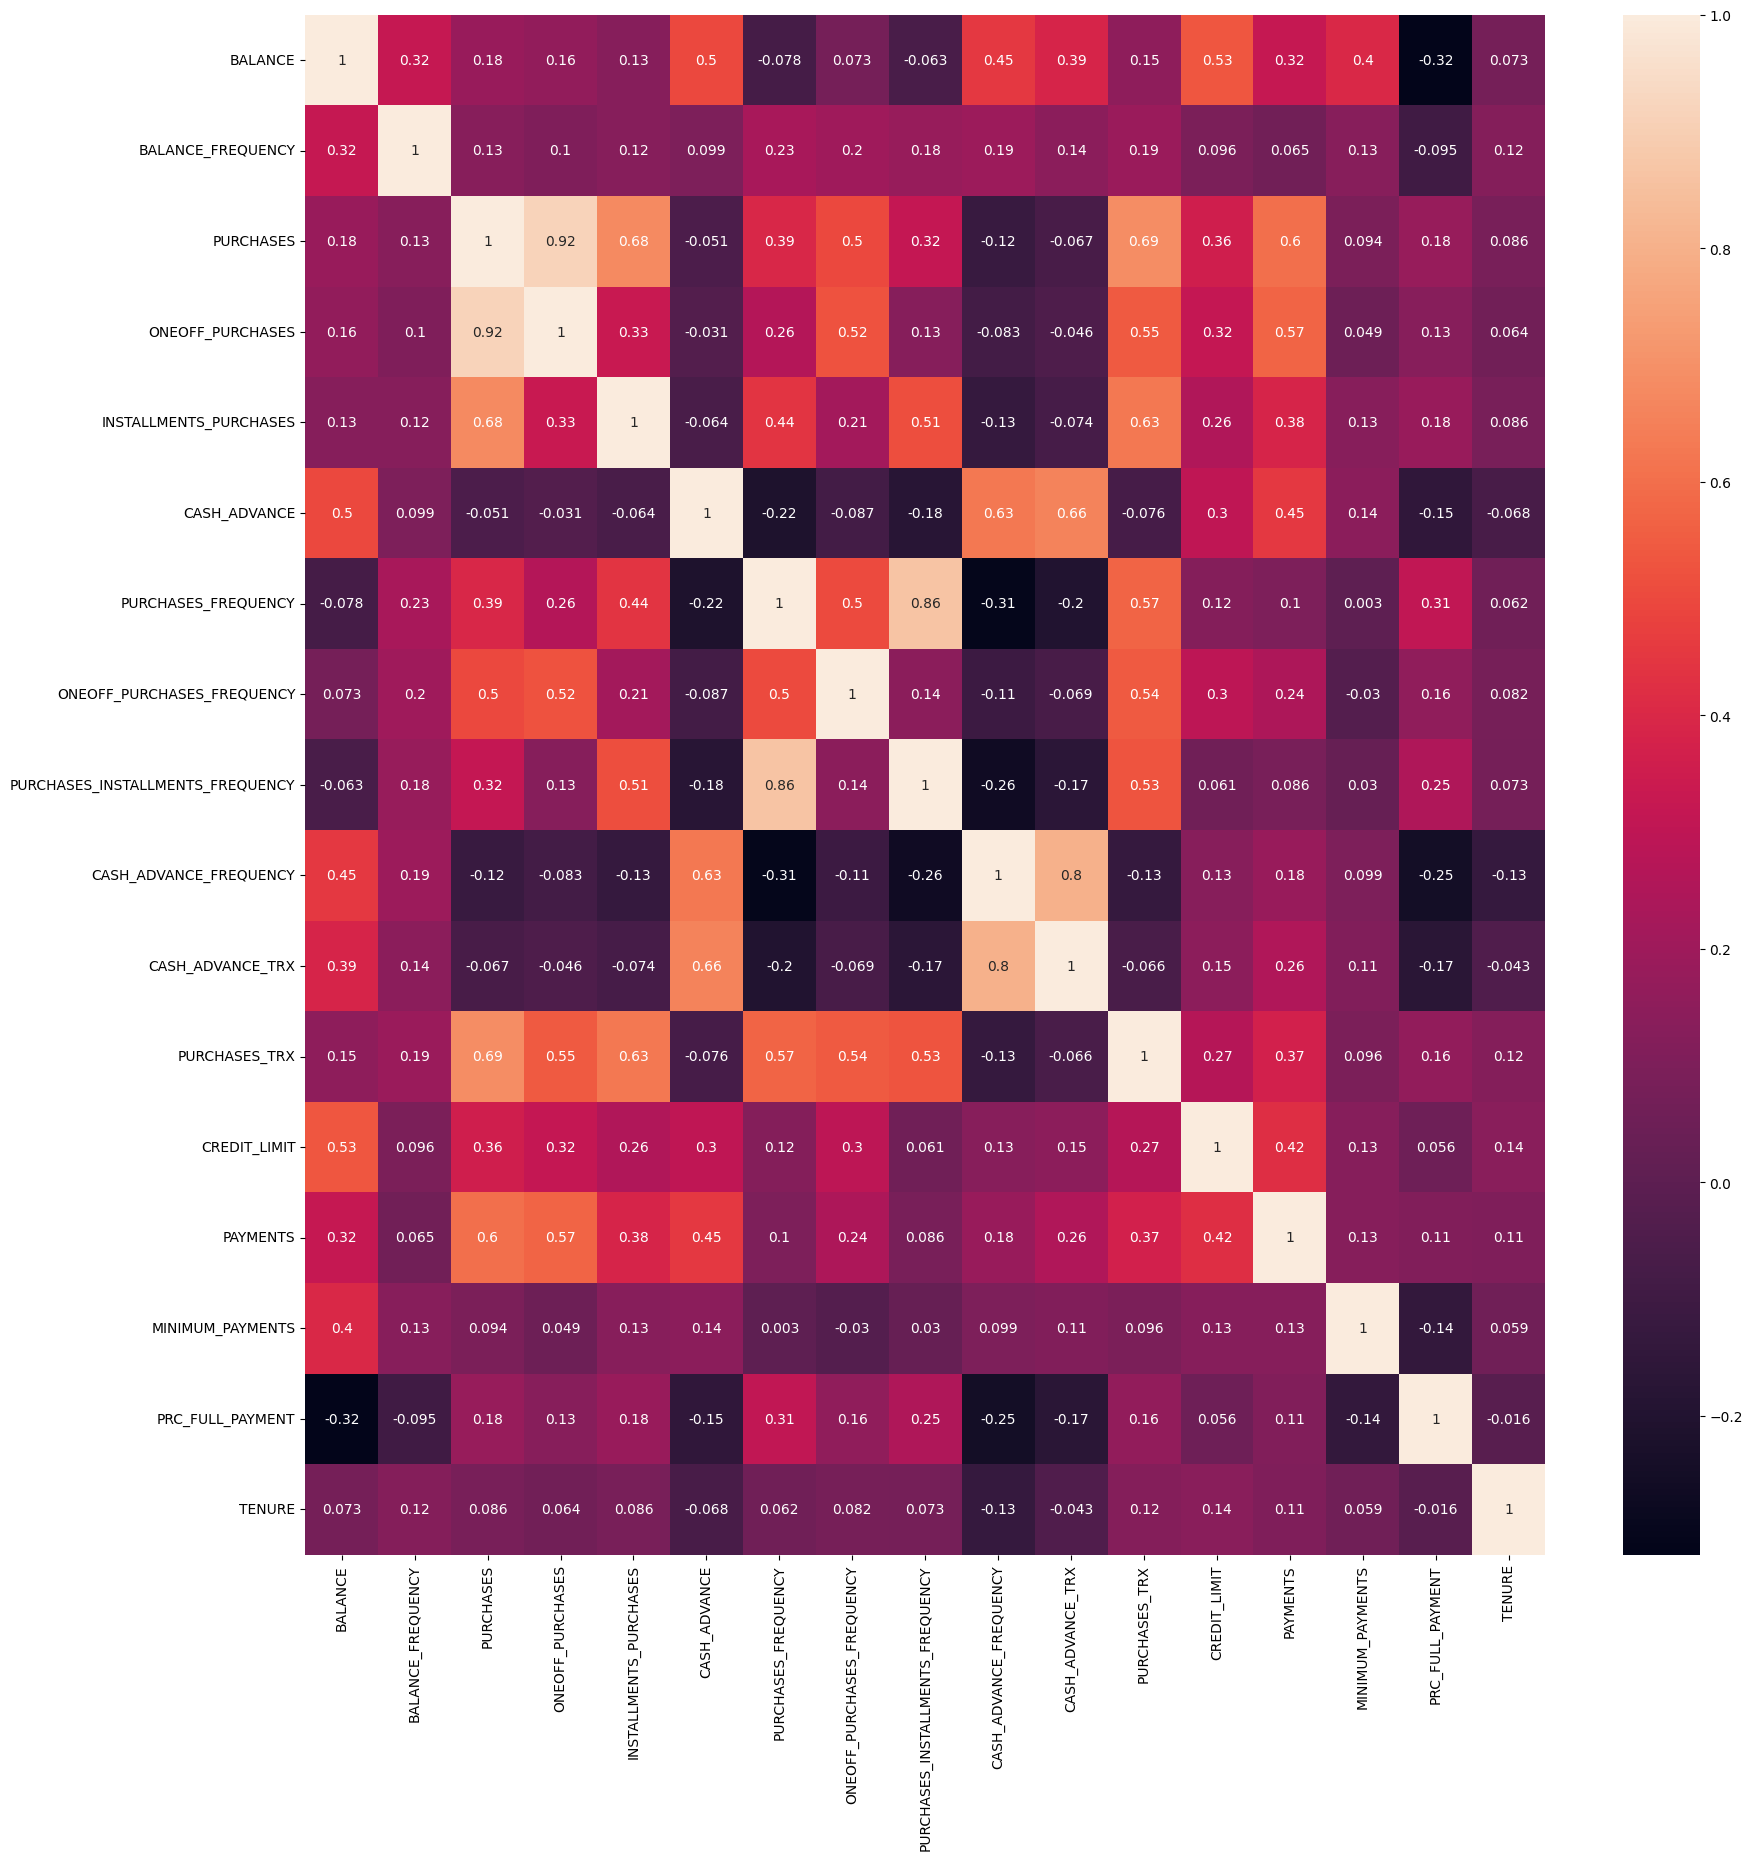

In [10]:
plt.figure(figsize=(20,20))
corr_df = data.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

In [11]:
data.drop(columns=['TENURE'], inplace=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [12]:
from sklearn.impute import KNNImputer
# Columns with missing values
null_columns = data.columns[data.isnull().any()].tolist()

# Fill Null values
imputer = KNNImputer(n_neighbors=5)
df_imp = pd.DataFrame(imputer.fit_transform(data[null_columns]), columns=null_columns)
data = data.fillna(df_imp)


In [13]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler() #Song song chỗ này 
X = pd.DataFrame(scale.fit_transform(data))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960383,-0.528979,-0.311729,-0.525551
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688676,0.818642,0.087047,0.234227
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826098,-0.383805,-0.103210,-0.525551
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826098,-0.598688,0.148440,-0.525551
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.266722,-0.525551


**PCA sklearn**

In [15]:
import time

In [16]:
from sklearn.decomposition import PCA

start = time.time()
pca = PCA(n_components = 2) 
X_1 = pca.fit_transform(X)
end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.038788795471191406 s


**PCA tuần tự**

In [17]:
def _PCA(X , num_components):
    
    mu = np.mean(X, axis=0) 
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.
    X_meaned = (X - mu) / std_filled 
    # Subtract the mean of each variable
    # X_meaned = X- np.mean(X , axis = 0)
     
    # Calculate the Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False,bias = True)
     
    # Compute the Eigenvalues and Eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    # Sort Eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    #sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    # Sort Eigenvalues in descending order
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    # Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [18]:
start = time.time()
X_2 = _PCA(X, 2)
end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.036749839782714844 s


**Tính đúng đắn**

In [19]:
X_2

array([[ 1.71854397,  1.07371994],
       [ 1.17023634, -2.50877247],
       [-0.93855956,  0.38228956],
       ...,
       [ 0.59323   ,  1.82837063],
       [ 2.00742271,  0.67453311],
       [ 0.21769102,  0.41832157]])

In [20]:
X_1

array([[-1.71854618, -1.07372283],
       [-1.17024086,  2.50876634],
       [ 0.93855929, -0.38228986],
       ...,
       [-0.59323119, -1.8283722 ],
       [-2.0074218 , -0.67453194],
       [-0.21768545, -0.41831436]])

In [21]:
np.mean(np.abs(X_1 - (-1)*X_2))

3.0254101505599443e-06

**Kmeans sklearn**

In [22]:
from sklearn.cluster import KMeans
import plotly.express as px

kmeans_sklearn = KMeans(n_clusters=4, n_init=10, max_iter=1000, verbose=False, random_state=300)

start = time.time()
clusters_sklean = pd.DataFrame(kmeans_sklearn.fit_predict(X_2), columns=['Cluster'])
end = time.time()
print(f'Processing time: {end - start} s')

    
#clusters_data = pd.concat([X, clusters], axis=1)

Processing time: 0.655132532119751 s


In [23]:
train_X=pd.DataFrame(X_2, columns=['d1','d2'])
clusters_data = pd.concat([train_X,clusters_sklean],axis=1)
clusters_data

,d1,d2,Cluster
0,1.718544,1.073720,3
1,1.170236,-2.508772,1
2,-0.938560,0.382290,0
3,0.898762,-0.070041,3
4,1.637624,0.685735,3
...,...,...,...
8945,0.024530,2.034111,0
8946,0.160560,1.454623,0
8947,0.593230,1.828371,0
8948,2.007423,0.674533,3


**Kmeans tuần tự**

In [24]:
def _Kmeans(x, k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    # Randomly choosing Centroids 
    centroids = x[idx, :]
     
    # Finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean')
     
    # Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances])
     
    # Repeating the above steps for a defined number of iterations
        # .... #


    # Randomly pick k data points as our initial Centroids.
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            # Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) # Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

In [25]:
from scipy.spatial.distance import cdist 

start = time.time()
label = _Kmeans(X_2, 4, 1000)
end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 17.862396240234375 s


**Tính đúng đắn**

In [26]:
clusters_sklean= clusters_sklean.to_numpy()

In [27]:
clusters_sklean

array([[3],
       [1],
       [0],
       ...,
       [0],
       [3],
       [3]], dtype=int32)

In [28]:
label

array([0, 2, 3, ..., 3, 0, 0])

In [29]:
fig = px.scatter(clusters_data, x='d1', y='d2', color='Cluster')
fig.show()

In [30]:
label= pd.Series(label)
labels_data = pd.concat([train_X,label.rename('label')],axis=1,names='label')
fig = px.scatter(labels_data, x='d1', y='d2', color='label')
fig.show()

In [31]:
def Scale_PCA_Kmeans_Sklearn(data, n_component, n_cluster):
  start = time.time()

  # Standard Scaling
  scale = StandardScaler()
  X = pd.DataFrame(scale.fit_transform(data))

  # PCA
  pca = PCA(n_components = n_component)
  X_1 = pca.fit_transform(X)

  # Kmeans
  kmeans_sklearn = KMeans(n_clusters = n_cluster, n_init=10, max_iter=1000, verbose=False, random_state=300)
  clusters_sklean = pd.DataFrame(kmeans_sklearn.fit_predict(X_1), columns=['Cluster'])
  X_train = pd.DataFrame(X_1, columns=['d1','d2'])
  clusters_data = pd.concat([X_train, clusters_sklean], axis=1)

  # Visualization
  fig = px.scatter(clusters_data, x='d1', y='d2', color='Cluster')
  fig.show()

  end = time.time()
  print(f'Processing time: {end - start} s')

Scale_PCA_Kmeans_Sklearn(data, 2, 4)

Processing time: 0.8486473560333252 s


In [32]:
def Scale_PCA_Kmeans_Sequential(data, n_component, n_cluster):
  start = time.time()

  # Standard Scaling
  scale = StandardScaler()
  X = pd.DataFrame(scale.fit_transform(data))

  # PCA
  X_2 = _PCA(X, n_component)

  # Kmeans
  label = _Kmeans(X_2, n_cluster, 1000)
  X_Train = pd.DataFrame(X_2, columns=['d1','d2'])
  label= pd.Series(label)
  labels_data = pd.concat([X_Train, label.rename('label')],axis=1,names='label')

  # Visualization
  fig = px.scatter(labels_data, x='d1', y='d2', color='label')
  fig.show()

  end = time.time()
  print(f'Processing time: {end - start} s')

Scale_PCA_Kmeans_Sequential(data, 2, 4)

Processing time: 19.01281452178955 s


**Kmeans step by step**

In [33]:
from math import sqrt


In [34]:
NUM_POINT = train_X.shape[0]

NUM_CLUSTER = 4

REPEAT = 1
ITERATIONS = 1000

In [35]:
#Phân các điểm vào các nhóm
def groupByCluster(points, clusters, centroids, num_points, num_centroids):
    for i0 in range(num_points):
        min_distance = -1
        for i1 in range(num_centroids):
            dx = points[i0, 0] - centroids[i1, 0]
            dy = points[i0, 1] - centroids[i1, 1]
            distance = sqrt(dx * dx + dy * dy)
            if min_distance > distance or min_distance == -1:
                min_distance = distance
                clusters[i0] = i1
    return clusters
#Tổng hợp trọng tâm sau khi phân nhóm
def centroidsSum(points, clusters, centroid_sum, centroid_num_points, num_points, num_centroids):
    for i in range(num_centroids):
        centroid_sum[i, 0] = 0
        centroid_sum[i, 1] = 0
        centroid_num_points[i] = 0

    for i in range(num_points):
        ci = clusters[i]
        centroid_sum[ci, 0] += points[i, 0]
        centroid_sum[ci, 1] += points[i, 1]
        centroid_num_points[ci] += 1

    return centroid_sum, centroid_num_points
#Tính toán lại trọng tâm
def calCentroids(centroids, centroid_sum, centroid_num_points,
                    num_centroids):
    for i in range(num_centroids):
        centroids[i, 0] = centroid_sum[i, 0] / centroid_num_points[i]
        centroids[i, 1] = centroid_sum[i, 1] / centroid_num_points[i]


In [36]:
def kmeans(points, clusters, centroids, centroid_sum, centroid_num_points, num_points, num_centroids):

    for i in range(ITERATIONS):
        groupByCluster(points, clusters, centroids, num_points, num_centroids )

        centroidsSum(points, clusters, centroid_sum, centroid_num_points, num_points, num_centroids)

        calCentroids(centroids, centroid_sum, centroid_num_points, num_centroids)

    return centroids, centroid_sum, centroid_num_points, clusters

In [37]:
listpoints = []
listpoints = [(x, y) for x, y in X_2]

points = np.ones((NUM_POINT, 2), dtype=np.float32)
clusters = np.ones(NUM_POINT, dtype=np.int32)

centroids = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
centroid_sum = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
centroid_num_point = np.ones(NUM_CLUSTER, dtype=np.int32)


for i, d in enumerate(listpoints):
  points[i, 0] = d[0]
  points[i, 1] = d[1]

In [38]:
def printCentroid(centroids, centroid_sum, centroid_num_point):
    for i in range(NUM_CLUSTER):
        print("[x={:6f}, y={:6f}, x_sum={:6f}, y_sum={:6f}, num_points={:d}]".format(
            centroids[i, 0], centroids[i, 1], centroid_sum[i, 0], centroid_sum[i, 1], centroid_num_point[i])
        )
    print('--------------------------------------------------')

In [39]:
start = time.time()
for i in range(REPEAT):
    for i1 in range(NUM_CLUSTER):
        centroids[i1, 0] = points[i1, 0]
        centroids[i1, 1] = points[i1, 1]

    centroids, centroid_sum, centroid_num_point, clusters = kmeans(points, clusters, centroids, centroid_sum, centroid_num_point, NUM_POINT, NUM_CLUSTER)

    if i + 1 == REPEAT:
        printCentroid(centroids, centroid_sum, centroid_num_point)

end = time.time()
total = (end - start) / REPEAT

print("Iterations: {:d}".format(ITERATIONS))
print("Average Time: {:.4f} s".format(total))

[x=-0.885203, y=1.177592, x_sum=-2935.332031, y_sum=3904.895996, num_points=3316]
[x=0.524890, y=-3.440034, x_sum=646.139771, y_sum=-4234.682129, num_points=1231]
[x=-5.970260, y=-0.673976, x_sum=-3026.921631, y_sum=-341.705627, num_points=507]
[x=1.364506, y=0.172355, x_sum=5316.114258, y_sum=671.496521, num_points=3896]
--------------------------------------------------
Iterations: 1000
Average Time: 76.2367 s


In [41]:
clusters

array([3, 1, 0, ..., 0, 3, 3], dtype=int32)

In [42]:
clusters_sklean

array([[3],
       [1],
       [0],
       ...,
       [0],
       [3],
       [3]], dtype=int32)

In [43]:
l1 = np.reshape(clusters, (-1, 1))
l1

array([[3],
       [1],
       [0],
       ...,
       [0],
       [3],
       [3]], dtype=int32)

In [44]:
l2=clusters_sklean
l2

array([[3],
       [1],
       [0],
       ...,
       [0],
       [3],
       [3]], dtype=int32)

In [45]:
l1.all()==l2.all()

True

In [61]:
def Scale_PCA_Kmeans_Sbs(data, NUM_CLUSTER, REPEAT, ITERATIONS):
  start = time.time()

  # Standard Scaling
  scale = StandardScaler()
  X = pd.DataFrame(scale.fit_transform(data))

  # PCA
  X_2 = _PCA(X, 2)

  #
  listpoints = [(x, y) for x, y in X_2]

  points = np.ones((NUM_POINT, 2), dtype=np.float32)
  clusters = np.ones(NUM_POINT, dtype=np.int32)

  centroids = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
  centroid_sum = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
  centroid_num_point = np.ones(NUM_CLUSTER, dtype=np.int32)

  for i, d in enumerate(listpoints):
    points[i, 0] = d[0]
    points[i, 1] = d[1]

  for i in range(REPEAT):
    for i1 in range(NUM_CLUSTER):
        centroids[i1, 0] = points[i1, 0]
        centroids[i1, 1] = points[i1, 1]

    centroids, centroid_sum, centroid_num_point, clusters = kmeans(points, clusters, centroids, centroid_sum, centroid_num_point, NUM_POINT, NUM_CLUSTER)

    if i + 1 == REPEAT:
        printCentroid(centroids, centroid_sum, centroid_num_point)

  # print results
  end = time.time()
  total = (end - start) / REPEAT

  print("Iterations: {:d}".format(ITERATIONS))
  print("Average Time: {:.4f} s".format(total))


Scale_PCA_Kmeans_Sbs(data, 4, 1, 1000)

[x=-0.885203, y=1.177592, x_sum=-2935.332031, y_sum=3904.895996, num_points=3316]
[x=0.524890, y=-3.440034, x_sum=646.139771, y_sum=-4234.682129, num_points=1231]
[x=-5.970260, y=-0.673976, x_sum=-3026.921631, y_sum=-341.705627, num_points=507]
[x=1.364506, y=0.172355, x_sum=5316.114258, y_sum=671.496521, num_points=3896]
--------------------------------------------------
Iterations: 1000
Average Time: 0.3402 s


## **Cài đặt song song**

### **Version 1**

**Phân tích:**   
 
**Thiết kế:** 


**Đánh giá:**   


In [46]:
import numba

#Phân các điểm vào các nhóm
@numba.jit(nopython=True)
def groupByCluster(points, clusters, centroids, num_points, num_centroids):
    for i0 in range(num_points):
        min_distance = -1
        for i1 in range(num_centroids):
            dx = points[i0, 0] - centroids[i1, 0]
            dy = points[i0, 1] - centroids[i1, 1]
            distance = sqrt(dx * dx + dy * dy)
            if min_distance > distance or min_distance == -1:
                min_distance = distance
                clusters[i0] = i1
    return clusters
#Tổng hợp trọng tâm sau khi phân nhóm
@numba.jit(nopython=True)
def centroidsSum(points, clusters, centroid_sum, centroid_num_points, num_points, num_centroids):
    for i in range(num_centroids):
        centroid_sum[i, 0] = 0
        centroid_sum[i, 1] = 0
        centroid_num_points[i] = 0

    for i in range(num_points):
        ci = clusters[i]
        centroid_sum[ci, 0] += points[i, 0]
        centroid_sum[ci, 1] += points[i, 1]
        centroid_num_points[ci] += 1

    return centroid_sum, centroid_num_points
#Tính toán lại trọng tâm
@numba.jit(nopython=True)
def calCentroids(centroids, centroid_sum, centroid_num_points,
                    num_centroids):
    for i in range(num_centroids):
        centroids[i, 0] = centroid_sum[i, 0] / centroid_num_points[i]
        centroids[i, 1] = centroid_sum[i, 1] / centroid_num_points[i]


In [47]:
def kmeans(points, clusters, centroids, centroid_sum, centroid_num_points, num_points, num_centroids):

    for i in range(ITERATIONS):
        groupByCluster(points, clusters, centroids, num_points, num_centroids )

        centroidsSum(points, clusters, centroid_sum, centroid_num_points, num_points, num_centroids)

        calCentroids(centroids, centroid_sum, centroid_num_points, num_centroids)

    return centroids, centroid_sum, centroid_num_points, clusters

In [48]:
listpoints = []
listpoints = [(x, y) for x, y in X_2]

points = np.ones((NUM_POINT, 2), dtype=np.float32)
clusters = np.ones(NUM_POINT, dtype=np.int32)

centroids = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
centroid_sum = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
centroid_num_point = np.ones(NUM_CLUSTER, dtype=np.int32)


for i, d in enumerate(listpoints):
  points[i, 0] = d[0]
  points[i, 1] = d[1]

start = time.time()
for i in range(REPEAT):
    for i1 in range(NUM_CLUSTER):
        centroids[i1, 0] = points[i1, 0]
        centroids[i1, 1] = points[i1, 1]

    centroids, centroid_sum, centroid_num_point, clusters = kmeans(points, clusters, centroids, centroid_sum, centroid_num_point, NUM_POINT, NUM_CLUSTER)

    if i + 1 == REPEAT:
        printCentroid(centroids, centroid_sum, centroid_num_point)

end = time.time()
total = (end - start) / REPEAT

print("Iterations: {:d}".format(ITERATIONS))
print("Average Time: {:.4f} s".format(total))

[x=-0.885203, y=1.177592, x_sum=-2935.332031, y_sum=3904.895996, num_points=3316]
[x=0.524890, y=-3.440034, x_sum=646.139771, y_sum=-4234.682129, num_points=1231]
[x=-5.970260, y=-0.673976, x_sum=-3026.921631, y_sum=-341.705627, num_points=507]
[x=1.364506, y=0.172355, x_sum=5316.114258, y_sum=671.496521, num_points=3896]
--------------------------------------------------
Iterations: 1000
Average Time: 0.8965 s


In [49]:
clusters

array([3, 1, 0, ..., 0, 3, 3], dtype=int32)

In [50]:
l1 = np.reshape(clusters, (-1, 1))
l1
l1.all()==l2.all()

True

In [51]:
def Scale_PCA_Kmeans_Ver1(data, NUM_CLUSTER, REPEAT, ITERATIONS):
  start = time.time()

  # Standard Scaling
  scale = StandardScaler()
  X = pd.DataFrame(scale.fit_transform(data))

  # PCA
  X_2 = _PCA(X, 2)

  #
  listpoints = [(x, y) for x, y in X_2]

  points = np.ones((NUM_POINT, 2), dtype=np.float32)
  clusters = np.ones(NUM_POINT, dtype=np.int32)

  centroids = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
  centroid_sum = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
  centroid_num_point = np.ones(NUM_CLUSTER, dtype=np.int32)

  for i, d in enumerate(listpoints):
    points[i, 0] = d[0]
    points[i, 1] = d[1]

  for i in range(REPEAT):
    for i1 in range(NUM_CLUSTER):
        centroids[i1, 0] = points[i1, 0]
        centroids[i1, 1] = points[i1, 1]
    
    centroids, centroid_sum, centroid_num_point, clusters = kmeans(points, clusters, centroids, centroid_sum, centroid_num_point, NUM_POINT, NUM_CLUSTER)

    # print kmeans clustering results
    if i + 1 == REPEAT:
        printCentroid(centroids, centroid_sum, centroid_num_point)

  # print time consumption
  end = time.time()
  total = (end - start) / REPEAT

  print("Iterations: {:d}".format(ITERATIONS))
  print("Average Time: {:.4f} s".format(total))

Scale_PCA_Kmeans_Ver1(data, 4, 1, 1000)

[x=-0.885203, y=1.177592, x_sum=-2935.332031, y_sum=3904.895996, num_points=3316]
[x=0.524890, y=-3.440034, x_sum=646.139771, y_sum=-4234.682129, num_points=1231]
[x=-5.970260, y=-0.673976, x_sum=-3026.921631, y_sum=-341.705627, num_points=507]
[x=1.364506, y=0.172355, x_sum=5316.114258, y_sum=671.496521, num_points=3896]
--------------------------------------------------
Iterations: 1000
Average Time: 0.4699 s


### **Version 2**

**Phân tích:**   
 
**Thiết kế:** 


**Đánh giá:**   


In [52]:
from numba import cuda
from numba import int32, float32

In [53]:
@cuda.jit('void(float32[:,:], int32[:],float32[:,:], int32, int32)')
def groupByClusterKernel(points, clusters, centroids, num_points, num_centroids):

    idx = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x

    if idx < num_points:
        min_distance = -1

        for i in range(num_centroids):
            dx = points[idx, 0] - centroids[i, 0]
            dy = points[idx, 1] - centroids[i, 1]
            distance = sqrt(dx * dx + dy * dy)
            #dis = distance(points[idx, 0], points[idx, 1], centroids[i, 0], centroids[i, 1])
            if min_distance > distance or min_distance == -1:
                min_distance = distance
                clusters[idx] = i

In [54]:
@cuda.jit('void(float32[:,:], int32[:], float32[:,:], int32[:], int32, int32)')
def centroidsSumKernel(points, clusters, centroid_sum, centroid_num_point, num_points, num_centroids):
    _centroid_sum_s = cuda.shared.array(shape=(NUM_CLUSTER, 2), dtype=float32)
    _centroid_num_point_s = cuda.shared.array(shape=NUM_CLUSTER, dtype=int32)

    tdx = cuda.threadIdx.x
    idx = cuda.blockIdx.x * cuda.blockDim.x + tdx

    if idx < num_centroids:
        centroid_sum[idx, 0] = 0.0
        centroid_sum[idx, 1] = 0.0
        centroid_num_point[idx] = 0

    cuda.syncthreads()

    if tdx < num_centroids:
        _centroid_sum_s[tdx, 0] = 0.0
        _centroid_sum_s[tdx, 1] = 0.0
        _centroid_num_point_s[tdx] = 0.0

    cuda.syncthreads()

    if idx < num_points:
        i = clusters[idx]
        cuda.atomic.add(_centroid_sum_s[i], 0, points[idx, 0]);
        cuda.atomic.add(_centroid_sum_s[i], 1, points[idx, 1]);
        cuda.atomic.add(_centroid_num_point_s, i, 1);

    cuda.syncthreads()

    if tdx < num_centroids:
        cuda.atomic.add(centroid_sum[tdx], 0, _centroid_sum_s[tdx, 0]);
        cuda.atomic.add(centroid_sum[tdx], 1, _centroid_sum_s[tdx, 1]);
        cuda.atomic.add(centroid_num_point, tdx, _centroid_num_point_s[tdx]);


In [55]:
@cuda.jit('void(float32[:,:], float32[:,:], int32[:], int32)')
def calCentroidsKernel(centroids, centroid_sum, centroid_num_point, num_centroids):

    idx = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x

    if idx < num_centroids:
        if centroid_num_point[idx] > 0:
            centroids[idx, 0] = centroid_sum[idx, 0] / centroid_num_point[idx]
            centroids[idx, 1] = centroid_sum[idx, 1] / centroid_num_point[idx]

In [56]:
from math import ceil
def kmeansGPU(points, clusters, centroids, centroid_sum, centroid_num_points, num_points, num_centroids):

    dpoints = cuda.to_device(points)
    dclusters = cuda.to_device(clusters)
    dcentroids = cuda.to_device(centroids)
    dcentroid_sum = cuda.to_device(centroid_sum)
    dcentroid_num_points = cuda.to_device(centroid_num_points)

    for i in range(ITERATIONS):
        groupByClusterKernel[ceil(NUM_POINT/25), 25](dpoints, dclusters, dcentroids, num_points, num_centroids)
        
        cuda.synchronize()

        centroidsSumKernel[ceil(NUM_POINT/25), 25]( dpoints, dclusters, dcentroid_sum, dcentroid_num_points, NUM_POINT, NUM_CLUSTER)
        
        cuda.synchronize()

        calCentroidsKernel[ceil(NUM_CLUSTER/10), 10](dcentroids, dcentroid_sum, dcentroid_num_points,NUM_CLUSTER)
        
        cuda.synchronize()

    clusters = dclusters.copy_to_host()
    centroids = dcentroids.copy_to_host()
    centroid_sum = dcentroid_sum.copy_to_host()
    centroid_num_points = dcentroid_num_points.copy_to_host()

    return clusters,centroids, centroid_sum, centroid_num_points

In [57]:
points_GPU = np.ones((NUM_POINT, 2), dtype=np.float32)
clusters_GPU = np.ones(NUM_POINT, dtype=np.int32)

centroids_GPU = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
centroid_sum_GPU = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
centroid_num_point_GPU = np.ones(NUM_CLUSTER, dtype=np.int32)


for i, d in enumerate(listpoints):
  points_GPU[i, 0] = d[0]
  points_GPU[i, 1] = d[1]

start = time.time()
for i in range(REPEAT):
    for i1 in range(NUM_CLUSTER):
        centroids_GPU[i1, 0] = points_GPU[i1, 0]
        centroids_GPU[i1, 1] = points_GPU[i1, 1]

    clusters_GPU,centroids_GPU, centroid_sum_GPU, centroid_num_point_GPU = kmeansGPU(points_GPU, clusters_GPU, centroids_GPU, centroid_sum_GPU, centroid_num_point_GPU, NUM_POINT, NUM_CLUSTER)
    
    if i + 1 == REPEAT:
        printCentroid(centroids_GPU, centroid_sum_GPU, centroid_num_point_GPU)

end = time.time()
total = (end - start) / REPEAT

print("Iterations: {:d}".format(ITERATIONS))
print("Average Time: {:.4f} s".format(total))

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning:

Grid size 1 will likely result in GPU under-utilization due to low occupancy.



[x=-0.885203, y=1.177592, x_sum=-2935.332764, y_sum=3904.896484, num_points=3316]
[x=0.524890, y=-3.440039, x_sum=646.140137, y_sum=-4234.688477, num_points=1231]
[x=-5.970259, y=-0.673975, x_sum=-3026.921143, y_sum=-341.705444, num_points=507]
[x=1.364505, y=0.172356, x_sum=5316.111816, y_sum=671.497131, num_points=3896]
--------------------------------------------------
Iterations: 1000
Average Time: 0.2681 s


In [58]:
clusters_GPU

array([3, 1, 0, ..., 0, 3, 3], dtype=int32)

In [59]:
clusters.all()==clusters_GPU.all()

True

In [60]:
def Scale_PCA_Kmeans_Ver2(data, NUM_CLUSTER, REPEAT, ITERATIONS):
  start = time.time()

  # Standard Scaling
  scale = StandardScaler()
  X = pd.DataFrame(scale.fit_transform(data))

  # PCA
  X_2 = _PCA(X, 2)
  X_train = pd.DataFrame(X_2, columns=['d1','d2'])
  NUM_POINT = X_train.shape[0]

  # GPU Kmeans
  points_GPU = np.ones((NUM_POINT, 2), dtype=np.float32)
  clusters_GPU = np.ones(NUM_POINT, dtype=np.int32)

  centroids_GPU = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
  centroid_sum_GPU = np.ones((NUM_CLUSTER, 2), dtype=np.float32)
  centroid_num_point_GPU = np.ones(NUM_CLUSTER, dtype=np.int32)


  for i, d in enumerate(listpoints):
    points_GPU[i, 0] = d[0]
    points_GPU[i, 1] = d[1]


  for i in range(REPEAT):
    for i1 in range(NUM_CLUSTER):
      centroids_GPU[i1, 0] = points_GPU[i1, 0]
      centroids_GPU[i1, 1] = points_GPU[i1, 1]

    clusters_GPU, centroids_GPU, centroid_sum_GPU, centroid_num_point_GPU = kmeansGPU(points_GPU, clusters_GPU, centroids_GPU, centroid_sum_GPU, centroid_num_point_GPU, NUM_POINT, NUM_CLUSTER)

    # print kmeans clustering results
    if i + 1 == REPEAT:
        printCentroid(centroids_GPU, centroid_sum_GPU, centroid_num_point_GPU)


  # print time consumption
  end = time.time()
  total = (end - start) / REPEAT

  print("Iterations: {:d}".format(ITERATIONS))
  print("Average Time: {:.4f} s".format(total))

Scale_PCA_Kmeans_Ver2(data, 4, 1, 1000)


[x=-0.885203, y=1.177592, x_sum=-2935.332520, y_sum=3904.896240, num_points=3316]
[x=0.524890, y=-3.440039, x_sum=646.140137, y_sum=-4234.688477, num_points=1231]
[x=-5.970258, y=-0.673975, x_sum=-3026.920898, y_sum=-341.705505, num_points=507]
[x=1.364505, y=0.172356, x_sum=5316.112305, y_sum=671.497131, num_points=3896]
--------------------------------------------------
Iterations: 1000
Average Time: 0.2959 s


## **Quá trình làm đồ án**

Sau bao ngày vất vả làm đồ án thì bây giờ đã kết thúc. Bây giờ là lúc để ngồi uống coffee và tĩnh tâm nhìn lại quá trình làm.

- Mỗi thành viên: Đã gặp những khó khăn gì? (Hay mọi chuyện đều thuận lợi)
    + Dương Đoàn Bảo Sơn
        * Gặp nhiều khó khăn về ngôn ngữ cũng như những kiến thức mới
        * Trong thời gian thực hiện cũng gặp một số vấn đề về sắp xếp thời gian
    
   
- Mỗi thành viên: Có học được gì hữu ích? (Hay không học được gì)
    + Dương Đoàn Bảo Sơn
        * Về kiến thức: Biết cách để thực hiện, giải quyết một vấn đề bài toán 
        * Về kỹ năng: Kỹ năng làm việc nhóm; Kỹ năng làm việc trên môi trường của Colab cũng như là kiến trúc tính toán song song CUDA trên GPU.
    
- Nhóm: Nếu có thêm thời gian thì sẽ làm gì?
    + Tìm ra kế hoạch song song khác tối ưu hơn về mặc thời gian. 
    + Sử dụng song song nhiều hơn ở các bước nhỏ để khi áp dụng lên những ảnh có kích thước lớn có thể thấy đc sức mạnh của việc song song hóa.
    + Cố gắng điều chỉnh lại notebook cho người đọc dễ tiếp cận hơn.